In [6]:
import cv2
import matplotlib.pyplot as plt

In [13]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0x7eff8d0f7430>

In [8]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


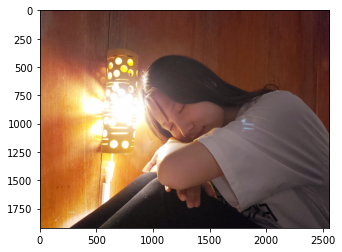

In [11]:
img = cv2.imread('IMG_20201212_231109.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [15]:
print(ClassIndex)

[[28]
 [ 1]]


In [19]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    # cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    # cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)
    cv2.rectangle(img,boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

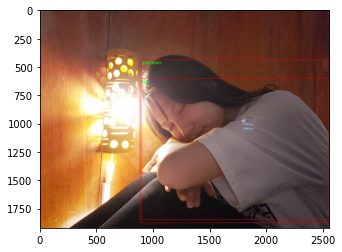

In [20]:
plt.imshow(img)

In [25]:
cap = cv2.VideoCapture("Record_2021_5_22.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame = cap.read()

    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.5q)

    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes, (255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
    
    cv2.imshow('Object Detection', frame)

    if(cv2.waitKey(2) & 0xFF == ord('q')):
        break

cap.release()
cv2.destroyAllWindows()
    

[[ 1]
 [85]
 [62]]
[[ 1]
 [85]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[ 1]
 [62]
 [85]]
[[ 1]
 [85]
 [62]]
[[ 1]
 [85]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[ 1]
 [62]
 [85]]
[[ 1]
 [85]
 [62]]
[[85]
 [ 1]
 [62]]
[[ 1]
 [85]
 [62]]
[[ 1]
 [85]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]]
[[85]
 [ 1]
 [62]
 [72]]